<a href="https://colab.research.google.com/github/Saran4B/DataScienceProject/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Price Prediction


The dataset used for this analysis is the Diamonds dataset from Kaggle. The dataset contains 50000 observations and 10 variables. The variables are as follows:

### Data Validation for modeling :
- Observations : 50,000

- Variables : 10


### Variables Description :
- carat : Weight of the diamond.
- cut : Quality of the cut (Fair, Good, Very Good, Premium, Ideal).
- color : Diamond colour, from J (worst) to D (best).
- clarity : How clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
- x : Length in mm.
- y : Width in mm.
- z : Depth in mm.
- depth : Total depth percentage.
- table : Width of top of diamond relative to widest point (43-95).
- price : Price in US dollars (326-18,823).




In [275]:
## Import the Standard operational packages.
import numpy as np
import pandas as pd

## Import vasualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [276]:
data = pd.read_csv("diamonds.csv")

In [277]:
data.shape

(50000, 10)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [279]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [280]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [281]:
data.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [282]:
#values count of categorical variables
cut = pd.DataFrame(data['cut'].value_counts())
color = pd.DataFrame(data['color'].value_counts())
clarity = pd.DataFrame(data['clarity'].value_counts())

In [283]:
print(cut), print(color), print(clarity)

           count
cut             
Ideal      19938
Premium    12806
Very Good  11204
Good        4557
Fair        1495
       count
color       
G      10452
E       9085
F       8864
H       7711
D       6224
I       5058
J       2606
         count
clarity       
SI1      12115
VS2      11404
SI2       8519
VS1       7579
VVS2      4694
VVS1      3369
IF        1632
I1         688


(None, None, None)

## Exploratory Data Analysis

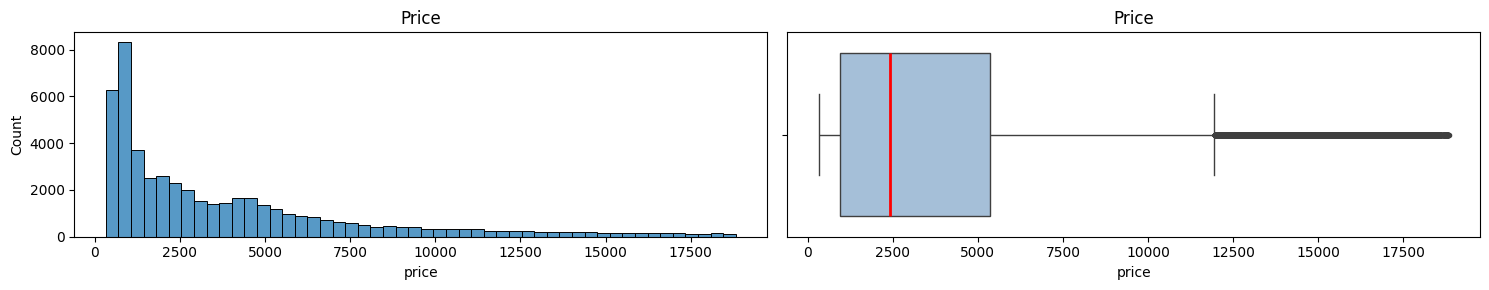

In [284]:
## Create a 1*2 plot figure
fig, axes = plt.subplots(1,2, figsize=(15,3))

## 0,0 price
sns.histplot(x = data['price'],ax=axes[0], stat="count", bins=50)
axes[0].set_title("Price")

## 0,1 price
sns.boxplot(x = data['price'],ax=axes[1],
            flierprops={"marker": "."},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2})
axes[1].set_title("Price")

plt.tight_layout()
plt.show()

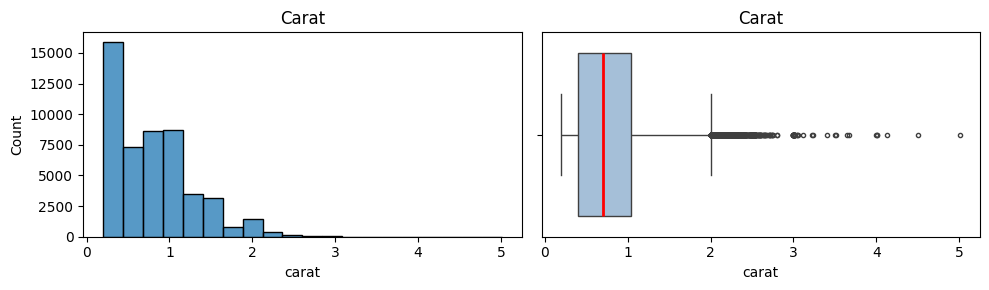

In [285]:
## Create a 1*2 plot figure
fig, axes = plt.subplots(1,2, figsize=(10,3))

## 0,0 carat
sns.histplot(x = data['carat'],ax=axes[0], stat="count", bins=20)
axes[0].set_title("Carat")

## 0,1 carat
sns.boxplot(x = data['carat'],ax=axes[1],
            flierprops={"marker": "."},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2})
axes[1].set_title("Carat")

plt.tight_layout()
plt.show()

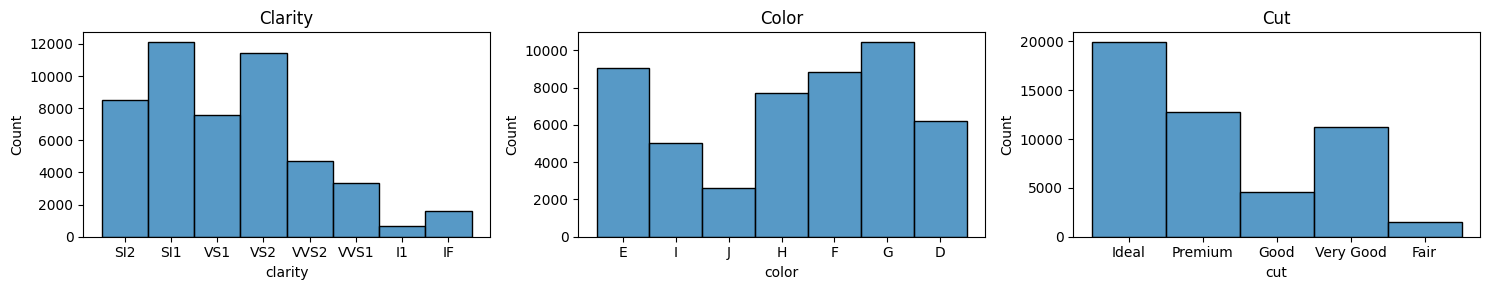

In [286]:
## Create a 1*2 plot figure
fig, axes = plt.subplots(1,3, figsize=(15,3))

## 0,0 clarity
sns.histplot(x = data['clarity'],ax=axes[0], stat="count", bins=20)
axes[0].set_title("Clarity")

## 0,1 color
sns.histplot(x = data['color'],ax=axes[1], stat="count", bins=20)
axes[1].set_title("Color")

## 0,2 cut
sns.histplot(x = data['cut'],ax=axes[2], stat="count", bins=20)
axes[2].set_title("Cut")

plt.tight_layout()
plt.show()

In [287]:
print(data['clarity'].value_counts(normalize=True))
print(data['color'].value_counts(normalize=True))
print(data['cut'].value_counts(normalize=True))

clarity
SI1     0.24230
VS2     0.22808
SI2     0.17038
VS1     0.15158
VVS2    0.09388
VVS1    0.06738
IF      0.03264
I1      0.01376
Name: proportion, dtype: float64
color
G    0.20904
E    0.18170
F    0.17728
H    0.15422
D    0.12448
I    0.10116
J    0.05212
Name: proportion, dtype: float64
cut
Ideal        0.39876
Premium      0.25612
Very Good    0.22408
Good         0.09114
Fair         0.02990
Name: proportion, dtype: float64


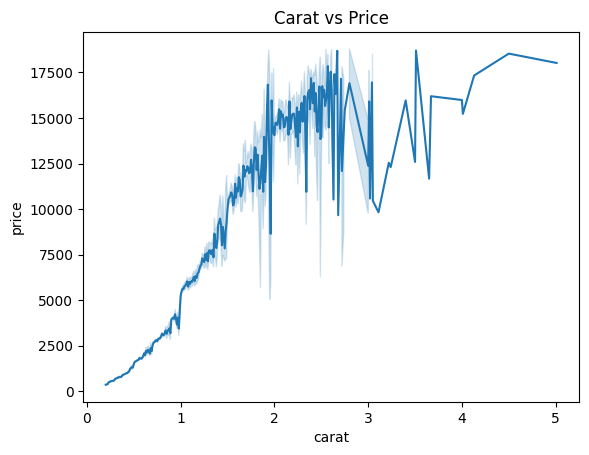

In [288]:
sns.lineplot(x='carat',y='price',data=data)
plt.title('Carat vs Price')
plt.show()

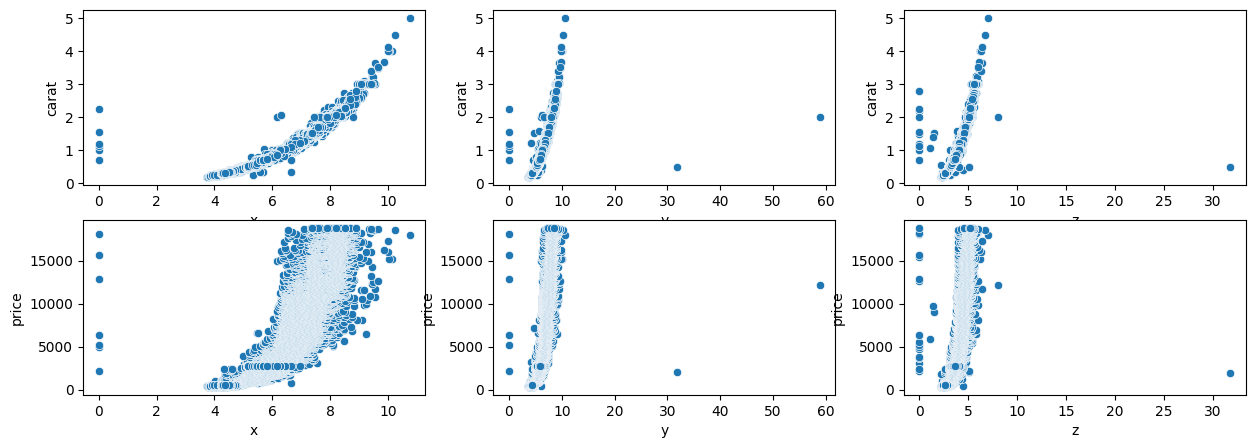

In [289]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
sns.scatterplot(x='x',y='carat',data=data, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=data, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=data, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=data, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=data, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=data, ax=ax[1,2])
plt.show()

In [290]:
#changing categorical variables to numerical variables
data['cut'] = data['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
data['color'] = data['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
data['clarity'] = data['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

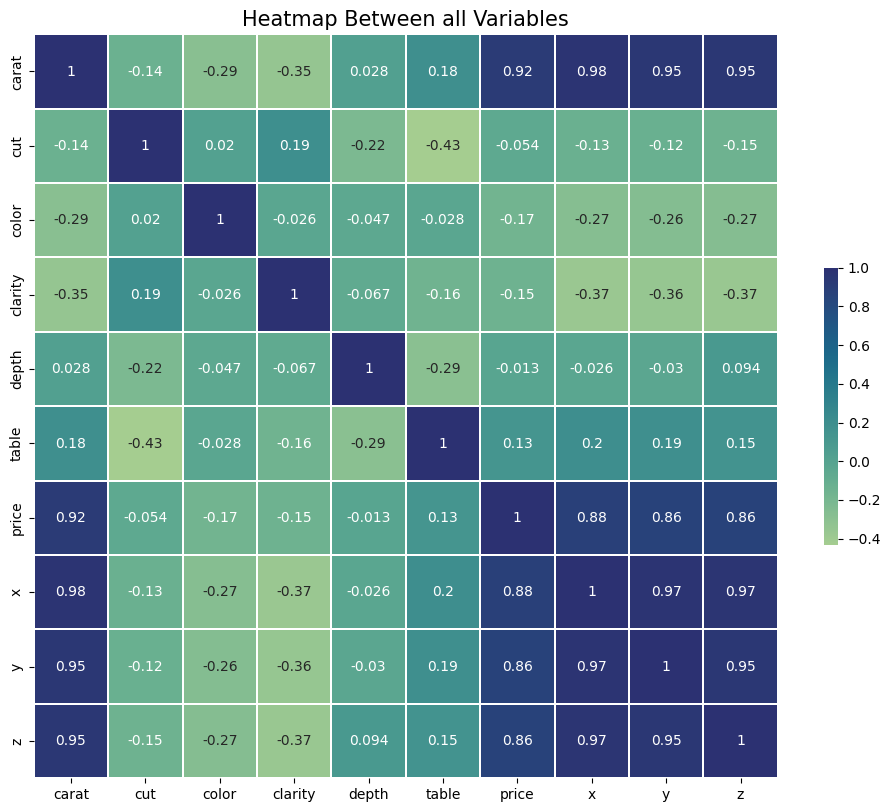

In [291]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr(),
            annot=True,
            cmap='crest',
            square=True,
            linewidths=.3,
            cbar_kws={'shrink': .3})

plt.title("Heatmap Between all Variables", fontsize=15)
plt.show()

In [292]:
X = data.drop('price', axis=1)
y = data['price']

## Train Test Split

In [293]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=44)

In [294]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 9), (10000, 9), (40000,), (10000,))

### Linear Regression

In [295]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [296]:
y_linear_preds = linear_model.predict(X_test)

In [297]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score

In [298]:
# function for evaluate model
def results(model, test_features, test_lables):
    # from sklearn.metrics import r2_score
    r_sq = r2_score(test_lables, model.predict(test_features))
    mse = mean_squared_error(test_lables,model.predict(test_features))
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_lables,model.predict(test_features))
    mape = mean_absolute_percentage_error(test_lables,model.predict(test_features))
    predictions = model.predict(test_features)
    errors = abs(predictions - test_lables)
    mape = 100 * np.mean(errors/test_lables)
    accuracy = 100 - mape
    ## print results
    print('Model Performance')
    print('Average Error: {:0.4f} '.format(np.mean(errors)))
    print('R-square = {:0.4f}'.format(r_sq))
    print('MSE = {:0.4f}'.format(mse))
    print('RMSE = {:0.4f}'.format(rmse))
    print('MAE = {:0.4f}'.format(mae))
    print('MAPE = {:0.4f}'.format(mape))
    print('Accuracy = {:0.2f}%'.format(accuracy))


    return accuracy

In [299]:
linear_result = results(linear_model,X_test, y_test)

Model Performance
Average Error: 809.2034 
R-square = 0.9102
MSE = 1453858.5669
RMSE = 1205.7606
MAE = 809.2034
MAPE = 44.1410
Accuracy = 55.86%


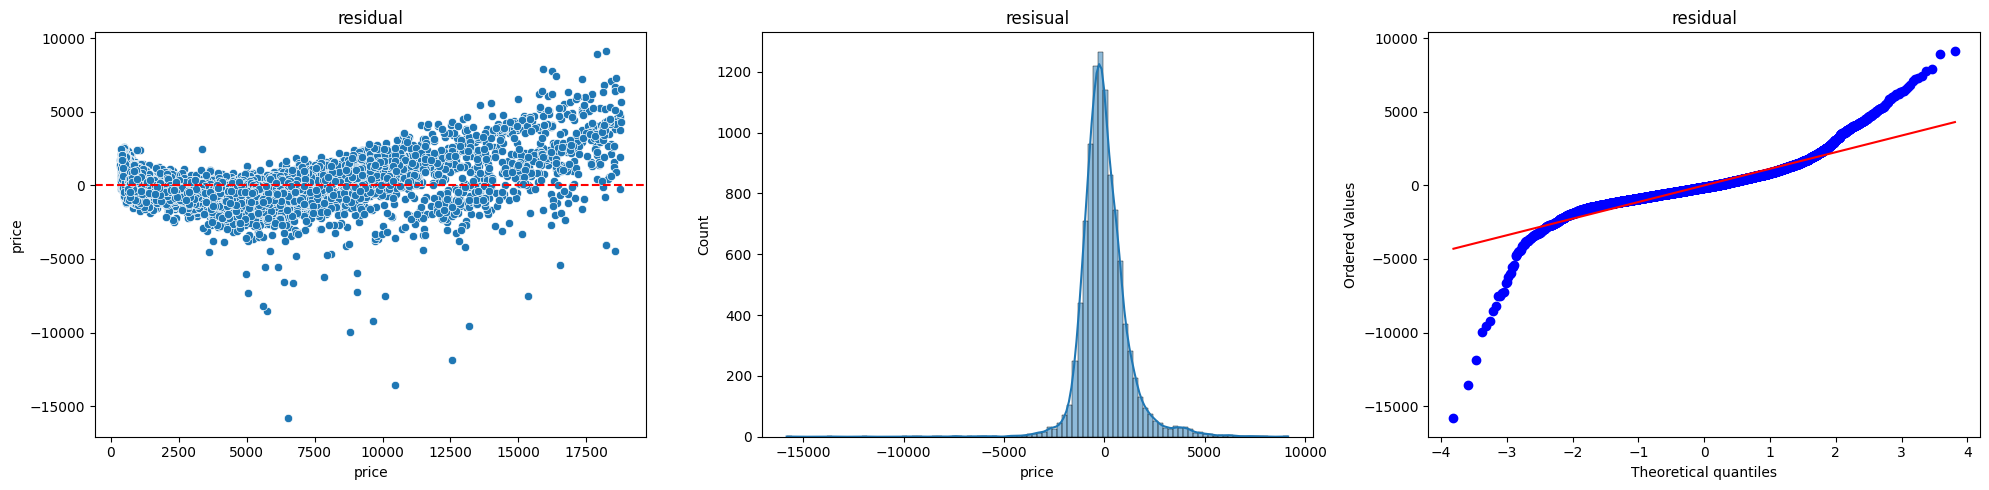

In [300]:
import scipy as sp

# residuals
residuals = y_test - y_linear_preds


## Create a 1*2 plot figure
fig, axes = plt.subplots(1,3, figsize=(20,5))

## 0,0
sns.scatterplot(x=y_test, y = residuals, ax=axes[0])
axes[0].axhline(y=0,color= 'red', ls='--')
axes[0].set_title("residual")

## 0,1
sns.histplot(residuals, kde=True, bins=100, ax=axes[1])
axes[1].set_title("resisual")

## 0,2
sp.stats.probplot(residuals, plot=axes[2])
axes[2].set_title("residual")

plt.tight_layout()
plt.show()

In [301]:
## Create function for save result to tablt
def model_results(model_name, model, test_features, test_lables):

    predictions = model.predict(test_features)
    errors = abs(predictions - test_lables)
    mape = 100 * np.mean(errors/test_lables)
    #accuracy = '{:0.2f}%'.format(100 - mape)
    accuracy = pd.to_numeric('{:0.2f}'.format(100 - mape))
    # from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    # mean_absolute_percentage_error
    r_sq = r2_score(test_lables, model.predict(test_features))
    mse = mean_squared_error(test_lables,model.predict(test_features))
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_lables,model.predict(test_features))
    mape = mean_absolute_percentage_error(test_lables,model.predict(test_features))


    ## pd.DataFrame
    table = pd.DataFrame({'Model': [model_name],
                          'Accuracy': [accuracy],
                          'Average Error': ['{:0.4f}'.format(np.mean(errors))],
                          'R-Square': ['{:0.4f}'.format(r_sq)],
                          'MSE' : [mse],
                          'RMSE': ['{:0.4f}'.format(rmse)],
                          'MAE' : ['{:0.4f}'.format(mae)],
                          'MAPE' : ['{:0.4f}'.format(mape)]
                         }
                        )

    return table

In [302]:
linear_train_result = model_results('LinearRegression', linear_model, X_train, y_train)
linear_train_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,LinearRegression,56.01,808.0974,0.9064,1.491506e+06,1221.2722,808.0974,0.4399


In [303]:
linear_test_result = model_results('LinearRegression', linear_model, X_test, y_test)
linear_test_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,LinearRegression,55.86,809.2034,0.9102,1.453859e+06,1205.7606,809.2034,0.4414


### Polynomail Feature

In [304]:
from sklearn.preprocessing import PolynomialFeatures

In [305]:
# check polynomial degree that fit to dataset

train_rmse_errors = []
test_rmse_errors =[]

for d in range(1,6):

  polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
  poly_features = polynomial_converter.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(poly_features,y ,test_size=0.2, random_state=44)

  model = LinearRegression()
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)

In [306]:
poly_results = pd.DataFrame()
poly_results['Order_Degree'] = [int(i) for i in np.linspace(1,5,5)]

In [307]:
poly_results['Train_rmse'] = pd.DataFrame(train_rmse_errors)
poly_results['Test_rmse'] = pd.DataFrame(test_rmse_errors)
poly_results

,Order_Degree,Train_rmse,Test_rmse
0,1,1221.272170,1.205761e+03
1,2,762.400749,1.116781e+03
2,3,598.920277,1.572631e+05
3,4,547.194259,1.022182e+06
4,5,504.349538,2.941990e+07


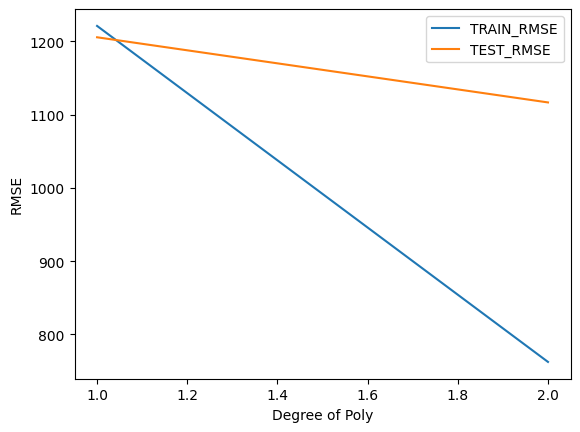

In [308]:
plt.plot(range(1,3), train_rmse_errors[:2], label='TRAIN_RMSE')
plt.plot(range(1,3), test_rmse_errors[:2], label='TEST_RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [309]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [310]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [311]:
poly_features = polynomial_converter.transform(X)

In [312]:
poly_features[0]

array([2.30000e-01, 5.00000e+00, 6.00000e+00, 2.00000e+00, 6.15000e+01,
       5.50000e+01, 3.95000e+00, 3.98000e+00, 2.43000e+00, 5.29000e-02,
       1.15000e+00, 1.38000e+00, 4.60000e-01, 1.41450e+01, 1.26500e+01,
       9.08500e-01, 9.15400e-01, 5.58900e-01, 2.50000e+01, 3.00000e+01,
       1.00000e+01, 3.07500e+02, 2.75000e+02, 1.97500e+01, 1.99000e+01,
       1.21500e+01, 3.60000e+01, 1.20000e+01, 3.69000e+02, 3.30000e+02,
       2.37000e+01, 2.38800e+01, 1.45800e+01, 4.00000e+00, 1.23000e+02,
       1.10000e+02, 7.90000e+00, 7.96000e+00, 4.86000e+00, 3.78225e+03,
       3.38250e+03, 2.42925e+02, 2.44770e+02, 1.49445e+02, 3.02500e+03,
       2.17250e+02, 2.18900e+02, 1.33650e+02, 1.56025e+01, 1.57210e+01,
       9.59850e+00, 1.58404e+01, 9.67140e+00, 5.90490e+00])

In [313]:
X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.2,random_state=44)

In [314]:
linear_poly_model = LinearRegression()

linear_poly_model.fit(X_train, y_train)

LinearRegression()

In [315]:
linear_poly_model.coef_

array([-1.16797262e+04,  1.97674569e+02, -2.97634763e+03, -2.96466469e+02,
        2.20582340e+02,  2.49770885e+02,  1.83387789e+04, -1.49789695e+04,
       -6.90655015e+03, -2.72855794e+03,  6.96219940e+02,  4.67910372e+02,
        1.27360352e+03,  5.21668863e+01,  3.94326000e+01,  2.31415939e+03,
        7.68619236e+02, -1.43188292e+03, -5.97426443e+00,  2.34592752e+01,
        6.13147182e+00,  7.83229397e+00, -1.23368230e+00, -5.59999779e+02,
        4.35129975e+02, -1.25060636e+02, -2.69577327e+01,  1.18158222e+02,
        2.74245347e+01,  2.52664069e+00, -3.87796844e+02,  7.04234845e+02,
       -2.96656701e+02, -4.28271699e+00, -1.13047308e+00, -6.62627828e+00,
       -5.57366313e+01,  7.29423003e+01, -9.39652746e+01, -1.60621922e+00,
       -2.15794003e+00, -4.99074001e+00,  1.90625295e+01, -6.07400468e+01,
       -8.60524720e-02, -4.77377623e+01, -5.82944644e+01,  1.31215999e+02,
        3.04252863e+02, -3.79281285e+02, -4.59321838e+03, -4.52575858e+02,
        5.57798028e+03,  

In [316]:
y_poly_preds = linear_poly_model.predict(X_test)

In [317]:
linear_poly_result = results(linear_poly_model,X_test, y_test)

Model Performance
Average Error: 472.2152 
R-square = 0.9230
MSE = 1247199.2995
RMSE = 1116.7808
MAE = 472.2152
MAPE = 19.9819
Accuracy = 80.02%


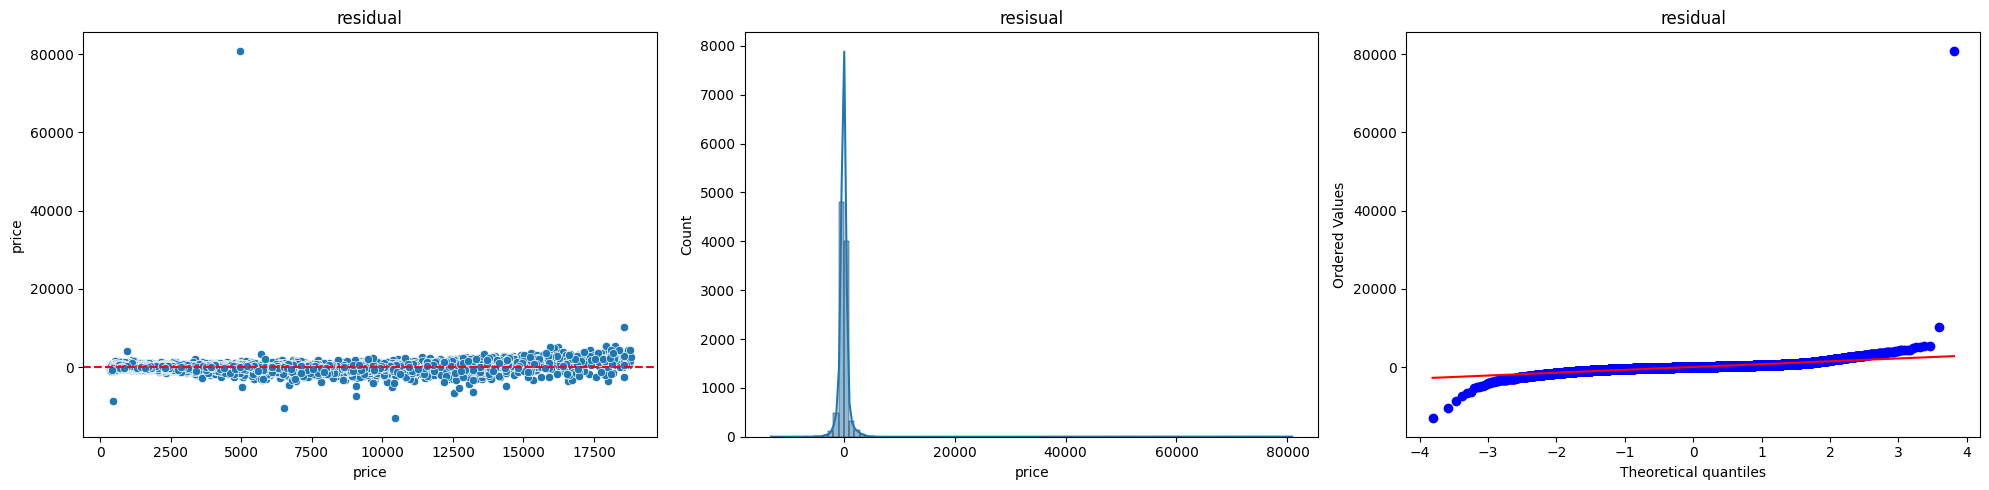

In [318]:
import scipy as sp

# residuals
residuals = y_test - y_poly_preds


## Create a 1*2 plot figure
fig, axes = plt.subplots(1,3, figsize=(20,5))

## 0,0
sns.scatterplot(x=y_test, y = residuals, ax=axes[0])
axes[0].axhline(y=0,color= 'red', ls='--')
axes[0].set_title("residual")

## 0,1
sns.histplot(residuals, kde=True, bins=100, ax=axes[1])
axes[1].set_title("resisual")

## 0,2
sp.stats.probplot(residuals, plot=axes[2])
axes[2].set_title("residual")

plt.tight_layout()
plt.show()

In [319]:
poly_train_result = model_results('Linear with PolynomialDegree 2', linear_poly_model, X_train, y_train)
poly_train_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,Linear with PolynomialDegree 2,80.46,459.2858,0.9635,581254.901658,762.4007,459.2858,0.1954


In [320]:
poly_test_result = model_results('Linear with PolynomialDegree 2', linear_poly_model, X_test, y_test)
poly_test_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,Linear with PolynomialDegree 2,80.02,472.2152,0.9230,1.247199e+06,1116.7808,472.2152,0.1998


## Regularization

In [321]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75


In [322]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [323]:
poly_features = pd.DataFrame(poly_features)
poly_features.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.23,5.0,6.0,2.0,61.5,55.0,3.95,3.98,2.43,0.0529,...,3025.0,217.25,218.90,133.65,15.6025,15.7210,9.5985,15.8404,9.6714,5.9049
1,0.21,4.0,6.0,3.0,59.8,61.0,3.89,3.84,2.31,0.0441,...,3721.0,237.29,234.24,140.91,15.1321,14.9376,8.9859,14.7456,8.8704,5.3361
2,0.23,2.0,6.0,5.0,56.9,65.0,4.05,4.07,2.31,0.0529,...,4225.0,263.25,264.55,150.15,16.4025,16.4835,9.3555,16.5649,9.4017,5.3361
3,0.29,4.0,2.0,4.0,62.4,58.0,4.20,4.23,2.63,0.0841,...,3364.0,243.60,245.34,152.54,17.6400,17.7660,11.0460,17.8929,11.1249,6.9169
4,0.31,2.0,1.0,2.0,63.3,58.0,4.34,4.35,2.75,0.0961,...,3364.0,251.72,252.30,159.50,18.8356,18.8790,11.9350,18.9225,11.9625,7.5625


In [324]:
# scale data
from sklearn.preprocessing import StandardScaler

In [325]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [326]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [327]:
X_train[0]

array([-1.0310211 ,  0.98578474, -0.2383146 ,  2.41210855,  0.51887044,
       -0.65570152, -1.2510663 , -1.18686844, -1.17055324, -0.72283929,
       -0.7479245 , -0.98134014, -0.26312381, -1.02077538, -1.03455331,
       -0.92618802, -0.91716241, -0.92097231,  1.07788622,  0.32885   ,
        2.74846703,  1.05133807,  0.93487037, -0.0733044 , -0.04828975,
       -0.02940005, -0.42686936,  1.44312668, -0.20885734, -0.29587425,
       -0.7512736 , -0.7327102 , -0.72038866,  2.98485313,  2.47865596,
        2.3253906 ,  1.3986852 ,  1.42122695,  1.44167446,  0.51039938,
       -0.34373922, -1.19952963, -1.13989757, -1.10515994, -0.65561573,
       -1.27934031, -1.22320956, -1.21582699, -1.14701337, -1.12365615,
       -1.12556828, -0.68086632, -1.07559548, -0.79666782])

### L2 : Ridge Regression

In [328]:
from sklearn.linear_model import Ridge

# set alpha like default = 10
ridge_model = Ridge(alpha=10)

ridge_model.fit(X_train, y_train)

y_ridge_preds = ridge_model.predict(X_test)

In [329]:
ridge_result = results(ridge_model,X_test, y_test)

Model Performance
Average Error: 471.9457 
R-square = 0.9611
MSE = 629280.0628
RMSE = 793.2717
MAE = 471.9457
MAPE = 20.1274
Accuracy = 79.87%


In [330]:
# Leave one out CV
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.01, 0.1,1.0,10.0), scoring='neg_mean_squared_error', cv=5)

ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), cv=5, scoring='neg_mean_squared_error')

In [331]:
ridge_cv_model.alpha_

10.0

In [332]:
ridge_cv_model.coef_

array([-8.21708367e+02,  5.35536876e+02, -9.52973277e+02, -2.26141948e+02,
        1.72149714e+02, -4.41027796e+02, -9.46343614e+02, -2.64692340e+02,
       -5.71048804e+02, -2.48803136e+03,  1.28092637e+03,  1.09486960e+03,
        2.45415433e+03, -9.70980370e+02, -4.48262762e+02,  2.48286389e+03,
        3.97276964e+03,  1.40041714e+03, -5.27080867e+01,  1.35099799e+02,
        5.39588058e+01,  1.85548963e+02, -2.72966017e+00, -1.71866672e+03,
        2.79936415e+01,  2.65983536e+02, -4.01703999e+02,  1.14741869e+03,
       -3.39626767e+02, -3.56593445e+02, -2.50195780e+02,  9.42275665e+02,
        3.38181308e+02, -8.08777629e+01, -1.71708465e+02, -6.36276408e+02,
       -4.51312308e+01,  1.22169834e+02, -6.51940728e+02, -4.67203949e+02,
        6.66633158e+02, -5.37037905e+02,  3.53959770e+02, -7.40609754e+02,
        3.17113933e+01, -6.86838048e+02, -3.22036323e+02,  2.80886367e+01,
       -2.73691753e+02,  7.49252959e+02, -1.86743792e+02, -1.15908221e+03,
        9.97217875e+02,  

In [333]:
ridge_results = results(ridge_cv_model, X_test, y_test)

Model Performance
Average Error: 471.9457 
R-square = 0.9611
MSE = 629280.0628
RMSE = 793.2717
MAE = 471.9457
MAPE = 20.1274
Accuracy = 79.87%


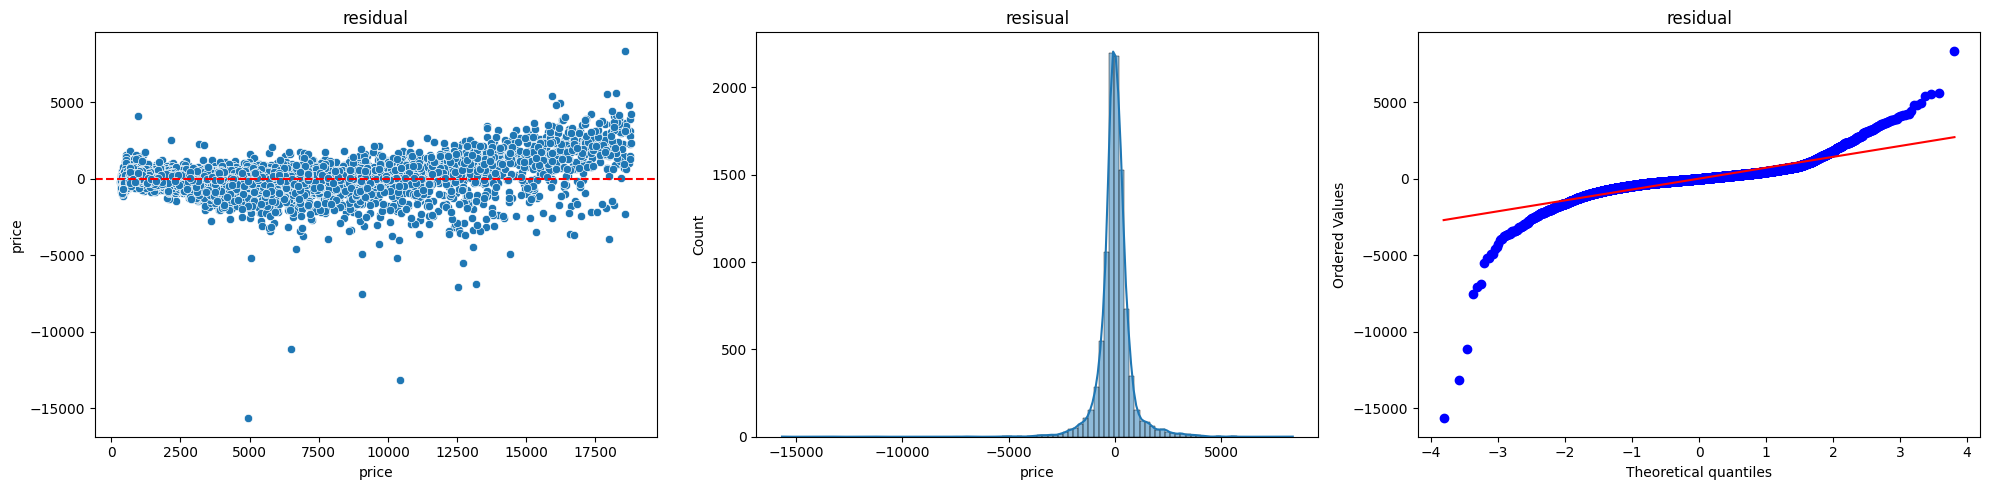

In [334]:
# residuals
y_ridge_preds = ridge_cv_model.predict(X_test)
residuals = y_test - y_ridge_preds


## Create a 1*2 plot figure
fig, axes = plt.subplots(1,3, figsize=(20,5))

## 0,0
sns.scatterplot(x=y_test, y = residuals, ax=axes[0])
axes[0].axhline(y=0,color= 'red', ls='--')
axes[0].set_title("residual")

## 0,1
sns.histplot(residuals, kde=True, bins=100, ax=axes[1])
axes[1].set_title("resisual")

## 0,2
sp.stats.probplot(residuals, plot=axes[2])
axes[2].set_title("residual")

plt.tight_layout()
plt.show()

In [335]:
ridge_train_result = model_results('RidgeRgressionCV', ridge_cv_model, X_train, y_train)
ridge_train_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,RidgeRgressionCV,79.9,466.0895,0.9624,598724.951286,773.7732,466.0895,0.2010


In [336]:
ridge_test_result = model_results('RidgeRgressionCV', ridge_cv_model, X_test, y_test)
ridge_test_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,RidgeRgressionCV,79.87,471.9457,0.9611,629280.062784,793.2717,471.9457,0.2013


### L1 : Lasso Regression

In [337]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(eps=0.001, n_alphas=30000, cv=5)

lasso_cv_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.074e+08, tolerance: 6.373e+07
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=5, n_alphas=30000)

In [338]:
lasso_cv_model.alpha_

5.233229103882542

In [339]:
lasso_cv_model.coef_

array([   -0.        ,    -0.        ,  -486.74616455,    -0.        ,
          36.23106884,     0.        ,   -36.03362594,    -0.        ,
          -0.        ,   -98.10657679,   456.32317675,  1430.1434186 ,
        2755.06600355,    -0.        ,    -0.        ,  2120.74975522,
         481.8790857 ,     0.        ,   -68.45580472,     0.        ,
          -0.        ,    -0.        ,    -0.        ,    -0.        ,
          -0.        ,    -0.        ,  -443.98744536,   891.17142449,
          -0.        ,   -52.43960961,    -0.        ,    -0.        ,
          -0.        ,  -165.14235221,    -0.        ,    -0.        ,
       -1416.86069357,    -0.        ,    -0.        ,     0.        ,
           0.        , -1511.33383565,    -0.        ,    -0.        ,
           0.        ,  -359.37167193,    -0.        ,    -0.        ,
          -0.        ,    -0.        ,     0.        ,   -67.62401432,
          -0.        ,    -0.        ])

In [340]:
y_lasso_preds = lasso_cv_model.predict(X_test)

In [341]:
lasso_result = results(lasso_cv_model, X_test, y_test)

Model Performance
Average Error: 476.2180 
R-square = 0.9589
MSE = 664583.9193
RMSE = 815.2202
MAE = 476.2180
MAPE = 17.9337
Accuracy = 82.07%


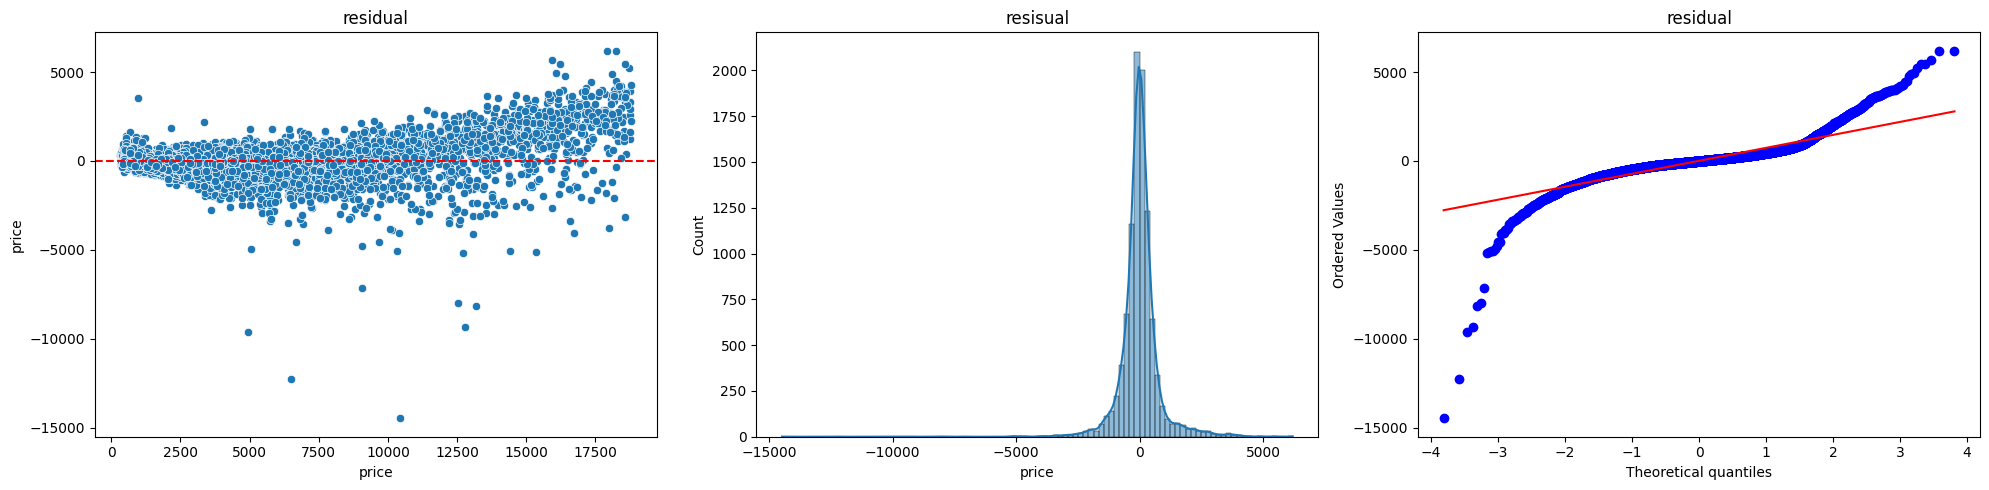

In [342]:
# residuals
residuals = y_test - y_lasso_preds


## Create a 1*2 plot figure
fig, axes = plt.subplots(1,3, figsize=(20,5))

## 0,0
sns.scatterplot(x=y_test, y = residuals, ax=axes[0])
axes[0].axhline(y=0,color= 'red', ls='--')
axes[0].set_title("residual")

## 0,1
sns.histplot(residuals, kde=True, bins=100, ax=axes[1])
axes[1].set_title("resisual")

## 0,2
sp.stats.probplot(residuals, plot=axes[2])
axes[2].set_title("residual")

plt.tight_layout()
plt.show()

In [343]:
lasso_train_result = model_results('LassoRgressionCV', lasso_cv_model, X_train, y_train)
lasso_train_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,LassoRgressionCV,82.2,473.9721,0.9579,671001.788554,819.1470,473.9721,0.1780


In [344]:
lasso_test_result = model_results('LassoRgressionCV', lasso_cv_model, X_test, y_test)
lasso_test_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,LassoRgressionCV,82.07,476.2180,0.9589,664583.9193,815.2202,476.2180,0.1793


### Elastic Net

In [345]:
from sklearn.linear_model import ElasticNetCV

elasticnet_cv_model = ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1],
                                   eps=0.001,n_alphas=10000, max_iter=1000000 , cv=5)

elasticnet_cv_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=1000000, n_alphas=10000)

In [346]:
elasticnet_cv_model.l1_ratio_

1.0

In [347]:
elasticnet_cv_model.coef_

array([   -0.        ,    -0.        ,  -263.88909672,    -0.        ,
           0.        ,     0.        ,  -336.99355296,    -0.        ,
          -0.        ,    -0.        ,   513.28251705,  1442.00678784,
        2779.28606924,    -0.        ,    -0.        ,  1236.71796373,
        1184.82883677,     0.        ,   -52.4828512 ,     0.        ,
          -0.        ,    -0.        ,    -0.        ,   -46.51046221,
          -0.        ,    -0.        ,  -439.35584645,   899.17045576,
          -0.        ,  -293.9295458 ,    -0.        ,    -0.        ,
          -0.        ,  -150.63296116,    -0.        ,    -0.        ,
       -1451.08492192,    -0.        ,    -0.        ,     0.        ,
           0.        , -1224.75726668,    -0.        ,    -0.        ,
          -0.        ,  -218.85596395,    -0.        ,    -0.        ,
          -0.        ,    -0.        ,     0.        ,  -176.80639298,
          -0.        ,    -0.        ])

In [348]:
y_elastic_preds = elasticnet_cv_model.predict(X_test)

In [349]:
elastic_result = results(elasticnet_cv_model,X_test, y_test)

Model Performance
Average Error: 476.8672 
R-square = 0.9588
MSE = 667699.5878
RMSE = 817.1289
MAE = 476.8672
MAPE = 18.0294
Accuracy = 81.97%


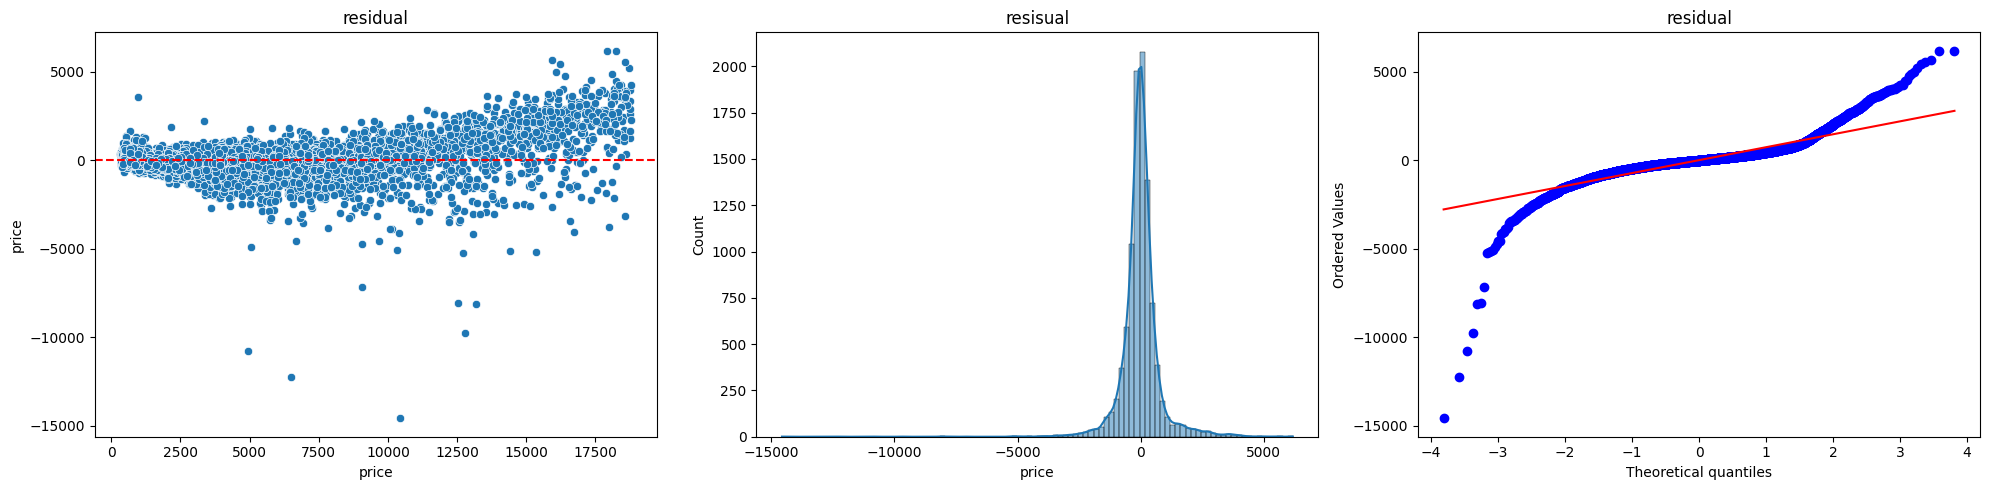

In [350]:
# residuals
residuals = y_test - y_elastic_preds


## Create a 1*2 plot figure
fig, axes = plt.subplots(1,3, figsize=(20,5))

## 0,0
sns.scatterplot(x=y_test, y = residuals, ax=axes[0])
axes[0].axhline(y=0,color= 'red', ls='--')
axes[0].set_title("residual")

## 0,1
sns.histplot(residuals, kde=True, bins=100, ax=axes[1])
axes[1].set_title("resisual")

## 0,2
sp.stats.probplot(residuals, plot=axes[2])
axes[2].set_title("residual")

plt.tight_layout()
plt.show()

In [351]:
elastic_train_result = model_results('ElasticNetCV', elasticnet_cv_model, X_train, y_train)
elastic_train_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,ElasticNetCV,82.11,474.4831,0.9578,671847.564138,819.6631,474.4831,0.1789


In [352]:
elastic_test_result = model_results('ElasticNetCV', elasticnet_cv_model, X_test, y_test)
elastic_test_result

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,ElasticNetCV,81.97,476.8672,0.9588,667699.587768,817.1289,476.8672,0.1803


In [353]:
train_results = pd.DataFrame()
train_results = pd.concat([linear_train_result, poly_train_result, ridge_train_result, lasso_train_result, elastic_train_result], axis=0)
train_results

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,LinearRegression,56.01,808.0974,0.9064,1.491506e+06,1221.2722,808.0974,0.4399
0,Linear with PolynomialDegree 2,80.46,459.2858,0.9635,5.812549e+05,762.4007,459.2858,0.1954
0,RidgeRgressionCV,79.90,466.0895,0.9624,5.987250e+05,773.7732,466.0895,0.2010
0,LassoRgressionCV,82.20,473.9721,0.9579,6.710018e+05,819.1470,473.9721,0.1780
0,ElasticNetCV,82.11,474.4831,0.9578,6.718476e+05,819.6631,474.4831,0.1789


In [354]:
test_results = pd.DataFrame()
test_results = pd.concat([linear_test_result, poly_test_result, ridge_test_result, lasso_test_result, elastic_test_result], axis=0)
test_results

,Model,Accuracy,Average Error,R-Square,MSE,RMSE,MAE,MAPE
0,LinearRegression,55.86,809.2034,0.9102,1.453859e+06,1205.7606,809.2034,0.4414
0,Linear with PolynomialDegree 2,80.02,472.2152,0.9230,1.247199e+06,1116.7808,472.2152,0.1998
0,RidgeRgressionCV,79.87,471.9457,0.9611,6.292801e+05,793.2717,471.9457,0.2013
0,LassoRgressionCV,82.07,476.2180,0.9589,6.645839e+05,815.2202,476.2180,0.1793
0,ElasticNetCV,81.97,476.8672,0.9588,6.676996e+05,817.1289,476.8672,0.1803


## Model Results

From the results table, Ridge Regression model, Lasso Regression model, and Elastic Net model have almost the same R-square, MSE, and RMSE. But if we consider the coefficients of the models, Ridge uses all of the 54 features for this performance. For the Lasso and elastic net model, the coefficients that are not equal to 0 are 18 and 17 coefficients in order and that means both of them use 18 and 17 features in the model for almost the same performance with Ridge model. However, The R-square, MSE, RMSE, and MAE from Ridge is slightly better than Lasso and Elastic Net.



There is something interesting about the predicted values. Some of the predicted values are negative which couldn't be explained by the models.

### Analyze the results

In [355]:
performance = pd.DataFrame()
performance['price'] = y_test.copy()

performance['ridge_cv_predict'] = y_ridge_preds.copy()

performance = pd.concat([performance, X], axis=1)

performance = performance.dropna()

#changing numerical variables to categorical variable
performance['cut'] = performance['cut'].map({5:'Ideal', 4:'Premium', 3:'Very Good', 2:'Good', 1:'Fair'})
performance['color'] = performance['color'].map({7:'D', 6:'E', 5:'F', 4:'G', 3:'H', 2:'I', 1:'J'})
performance['clarity'] = performance['clarity'].map({8:'IF', 7:'VVS1', 6:'VVS2', 5:'VS1', 4:'VS2', 3:'SI1', 2:'SI2', 1:'I1'})

performance

,price,ridge_cv_predict,carat,cut,color,clarity,depth,table,x,y,z
49457,2657.0,2822.397074,0.70,Premium,F,VS2,60.2,59.0,5.78,5.74,3.47
20706,628.0,581.052174,0.31,Very Good,I,VS1,63.5,57.0,4.28,4.26,2.71
46059,2149.0,2355.538988,0.71,Fair,F,SI1,57.0,62.0,5.84,5.87,3.34
38076,1193.0,1445.721801,0.38,Ideal,F,IF,61.0,56.0,4.68,4.70,2.86
8394,4531.0,4566.956709,0.93,Very Good,E,SI1,63.1,57.0,6.19,6.17,3.90
...,...,...,...,...,...,...,...,...,...,...,...
34398,969.0,571.625461,0.41,Premium,E,SI1,61.0,59.0,4.82,4.78,2.93
41323,1607.0,1761.185587,0.53,Ideal,E,VS2,61.0,57.0,5.23,5.26,3.20
17138,7550.0,8070.182788,1.31,Premium,H,VS2,61.4,59.0,7.01,6.96,4.29
14034,6105.0,6282.390463,1.21,Ideal,F,SI2,61.8,57.0,6.87,6.82,4.23


In [356]:
## predicted values < 0
performance[performance['ridge_cv_predict'] < 0].describe()

,price,ridge_cv_predict,carat,depth,table,x,y,z
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,687.837838,-248.669566,0.337027,61.909910,56.681081,4.486126,4.476216,2.770360
std,227.130621,349.269932,0.053404,1.350552,2.168934,0.300255,0.243389,0.147617
min,375.000000,-3186.989954,0.230000,56.000000,49.000000,3.870000,3.850000,2.450000
25%,546.000000,-341.014760,0.310000,61.200000,55.000000,4.330000,4.320000,2.700000
50%,631.000000,-155.174655,0.320000,62.000000,56.000000,4.430000,4.430000,2.750000
75%,765.500000,-74.248129,0.350000,62.750000,58.000000,4.555000,4.565000,2.820000
max,2176.000000,-1.052427,0.700000,64.600000,64.000000,6.650000,5.690000,3.530000


In [362]:
performance[performance['ridge_cv_predict'] < 0][['ridge_cv_predict', 'color', 'cut', 'clarity']].groupby(['color', 'cut', 'clarity']).describe()

ridge_cv_predict                           \
                                   count         mean         std   
color cut       clarity                                             
D     Fair      SI2                  1.0  -716.330891         NaN   
      Good      SI1                  7.0   -93.638081   61.669652   
                SI2                  7.0  -300.183956  128.943418   
      Ideal     I1                   2.0  -240.347867  194.045151   
                SI1                  1.0   -13.324447         NaN   
                SI2                 14.0  -116.689019   71.494865   
      Premium   SI2                 13.0  -129.983894   64.651411   
      Very Good SI1                  2.0   -56.578673   78.525969   
                SI2                  5.0   -56.863934   31.478901   
E     Fair      SI1                  1.0  -129.380825         NaN   
H     Good      VVS1                 1.0  -247.489102         NaN   
      Ideal     IF                   1.0    -6.302731         NaN   
      Premium   IF                   2.0   -40.607939   27.914576   
                SI1                  1.0  -333.840600         NaN   
      Very Good IF                   1.0  -138.522244         NaN   
I     Good      IF                   1.0  -413.069718         NaN   
                VVS1                 2.0   -98.872063  105.473917   
      Ideal     IF                  13.0  -287.285802  121.981554   
                VVS1                 7.0  -100.341002   68.660980   
      Premium   IF                   5.0  -454.410151  128.396120   
                VVS1                 4.0  -109.527128   85.883544   
      Very Good IF                   3.0  -367.298181  133.456744   
                VVS1                 2.0  -118.597117   10.822010   
J     Good      VVS2                 2.0   -67.434415   74.861428   
      Ideal     IF                   3.0  -831.978737  313.338768   
                VVS1                 5.0  -492.581846   91.222454   
                VVS2                 2.0  -160.445871  106.495470   
      Premium   IF                   1.0 -1006.156235         NaN   
                VS1                  1.0 -3186.989954         NaN   
      Very Good VVS1                 1.0  -272.634718         NaN   

                                                                             \
                                 min          25%          50%          75%   
color cut       clarity                                                       
D     Fair      SI2      -716.330891  -716.330891  -716.330891  -716.330891   
      Good      SI1      -176.712435  -134.946329  -107.813819   -36.795843   
                SI2      -456.704520  -353.138577  -348.188920  -266.801029   
      Ideal     I1       -377.558509  -308.953188  -240.347867  -171.742546   
                SI1       -13.324447   -13.324447   -13.324447   -13.324447   
                SI2      -285.797287  -135.002812   -94.690394   -67.524531   
      Premium   SI2      -221.728203  -171.742796  -149.153087  -100.039361   
      Very Good SI1      -112.104918   -84.341795   -56.578673   -28.815550   
                SI2       -83.929827   -82.246540   -71.016753   -32.746837   
E     Fair      SI1      -129.380825  -129.380825  -129.380825  -129.380825   
H     Good      VVS1     -247.489102  -247.489102  -247.489102  -247.489102   
      Ideal     IF         -6.302731    -6.302731    -6.302731    -6.302731   
      Premium   IF        -60.346524   -50.477232   -40.607939   -30.738646   
                SI1      -333.840600  -333.840600  -333.840600  -333.840600   
      Very Good IF       -138.522244  -138.522244  -138.522244  -138.522244   
I     Good      IF       -413.069718  -413.069718  -413.069718  -413.069718   
                VVS1     -173.453385  -136.162724   -98.872063   -61.581402   
      Ideal     IF       -484.832851  -361.272137  -296.594137  -248.240541   
                VVS1     -237.763058  -118.283773   -74.667476   -54.986713   
      Pr

In [358]:
## Pivot table of price(y) and categorical variable
pd.pivot_table(data=performance, values='price', index=['color', 'clarity'],
                       columns=['cut'], aggfunc="mean")

cut                   Fair          Good         Ideal      Premium  \
color clarity                                                         
D     I1       5460.000000           NaN    742.000000  3683.000000   
      IF       1440.000000  16167.000000   3328.166667  6190.666667   
      SI1      5957.900000   2702.638298   2324.689394  2995.556701   
      SI2      3601.090909   3554.354167   2530.606061  4917.604938   
      VS1      3823.000000   6093.000000   2272.983871  5657.727273   
      VS2      3964.250000   5134.900000   2216.132948  2919.293103   
      VVS1             NaN   1351.666667   2890.250000  2792.000000   
      VVS2     3956.250000   5174.000000   4339.795918  2558.785714   
E     I1       2087.000000   6564.000000   6400.500000  3260.666667   
      IF               NaN   2923.000000   3434.150000  4937.142857   
      SI1      4834.636364   3348.310345   2728.532051  2936.189189   
      SI2      5730.833333   4518.575758   3773.371795  3651.806122   
      VS1      1851.750000   3468.285714   1902.553571  2895.431373   
      VS2      2987.100000   4162.333333   2201.290476  3092.718750   
      VVS1     2805.000000    998.200000   1819.449275  2099.200000   
      VVS2      738.000000   2388.142857   2648.138614  2173.000000   
F     I1       1231.500000   2121.166667   3398.300000  3442.111111   
      IF       3205.000000   2013.000000   2460.617021  5007.750000   
      SI1      3067.076923   3705.753846   3720.575221  3473.733945   
      SI2      5637.687500   3721.020408   4567.600000  4782.019802   
      VS1      4744.857143   2681.125000   3706.254386  3674.934426   
      VS2      3211.000000   4222.470588   2988.641379  4024.622951   
      VVS1             NaN   1214.500000   2798.247191  4484.250000   
      VVS2             NaN   3676.142857   3479.270588  3478.612903   
G     I1       3208.000000   3262.750000   3413.500000  6163.000000   
      IF               NaN   3931.000000   2595.300971  3217.823529   
      SI1      4264.272727   4732.939394   3245.291971  5041.342593   
      SI2      4621.421053   4404.137931   4334.348315  6249.392157   
      VS1      2930.666667   4105.161290   4213.805263  4251.625000   
      VS2      3802.428571   3606.357143   4125.512048  4195.048387   
      VVS1             NaN   3816.833333   3089.074380  3518.793103   
      VVS2     2078.000000   2618.888889   3633.941606  5183.173077   
H     I1       2929.000000   7959.000000   5228.333333  3188.000000   
      IF               NaN           NaN   2236.787879  3525.800000   
      SI1      4858.000000   3302.585366   4527.907143  6312.512397   
      SI2      6808.222222   5047.200000   5487.120879  7003.830189   
      VS1      3599.000000   4579.333333   3501.438202  4298.925926   
      VS2      6545.800000   4357.400000   3873.126214  5217.311321   
      VVS1             NaN   1303.250000   1617.796610  1506.379310   
      VVS2             NaN   2951.000000   2486.508475  2216.766667   
I     I1       3697.571429           NaN   6833.666667  2520.250000   
      IF               NaN   2182.500000   2162.789474   977.833333   
      SI1      4669.900000   3389.047619   5481.552083  6277.085366   
      SI2      7120.444444   8168.727273   7372.333333  7150.052632   
      VS1      2104.000000   6524.705882   4631.419753  4430.282051   
      VS2      4500.500000   5935.500000   4387.315068  6581.140625   
      VVS1     4194.000000   2114.142857   1819.620690  2156.866667   
      VVS2             NaN   3351.200000   2967.000000  2361.090909   
J     I1       5184.142857   4492.000000  16538.000000  2825.000000   
      IF               NaN           NaN   4936.666667  5611.000000   
      SI1      3195.333333   7255.600000   4959.976744  5581.081633   
      SI2      2822.800000   3283.100000   5799.461538  8755.000000   
      VS1      5362.000000   3282.363636   4362.527778  5460.966667   
      VS2      6659.000000   4669.565217   5838.454545  5159.358974   
      VVS1             N

In [359]:
## Pivot table of predicted value(y-hat) and categorical variable
pd.pivot_table(data=performance, values='ridge_cv_predict', index=['color', 'clarity'],
                       columns=['cut'], aggfunc="mean")

cut                   Fair          Good         Ideal      Premium  \
color clarity                                                         
D     I1       6834.079267           NaN   -240.347867  4703.976290   
      IF       1589.129767  11450.910881   2945.084876  4730.752045   
      SI1      5990.941583   2490.235770   2144.452755  2859.098853   
      SI2      3729.121322   3397.106536   2407.802829  4984.123578   
      VS1      3721.243977   6202.862729   2546.157333  5839.732060   
      VS2      3990.116651   4994.485667   2058.494707  2610.428068   
      VVS1             NaN   1336.251466   3220.876941  3597.842194   
      VVS2     3908.535049   5947.495443   4219.545719  2589.461264   
E     I1       2570.057580   8720.862836  10758.525497  5711.325019   
      IF               NaN   3592.769180   3475.433267  5149.857760   
      SI1      4661.012147   3336.782528   2741.055728  2816.841059   
      SI2      5471.400566   4470.740573   3954.879286  3738.721262   
      VS1      1764.742333   3504.252458   2210.137680  3049.457406   
      VS2      3115.187017   4076.464715   2223.336090  2969.715845   
      VVS1     2920.536785   1314.166774   2125.327589  2273.915120   
      VVS2      648.512562   2296.872791   2824.905447  2299.638386   
F     I1       1296.009441   2968.287422   3747.379797  4463.053070   
      IF       4458.638719   2498.616173   2379.218236  5112.761187   
      SI1      3122.465168   3690.186254   3804.273941  3481.772366   
      SI2      5279.121611   3821.124878   4653.658110  5183.012061   
      VS1      4821.090689   2786.764045   3786.882853  3733.487833   
      VS2      3239.283465   4200.326303   2949.339289  3766.088987   
      VVS1             NaN   1204.591884   2820.101414  4332.076059   
      VVS2             NaN   3757.853369   3440.310556  3540.665218   
G     I1       4105.617087   4522.826826   4121.495576  7992.200672   
      IF               NaN   3691.400959   2559.146639  3143.775498   
      SI1      3697.361991   4609.929402   3362.178650  5081.712523   
      SI2      4492.357379   4620.989139   4377.503834  6204.717612   
      VS1      2792.246778   4086.154643   4187.247992  4235.398971   
      VS2      3515.259627   3508.614572   4006.538456  4016.043543   
      VVS1             NaN   3728.150588   3084.289356  3561.795477   
      VVS2     2568.683104   2435.438161   3595.274027  5054.512133   
H     I1       3302.983225   9528.482748   6075.485112  4661.174500   
      IF               NaN           NaN   1990.368535  3598.486607   
      SI1      4775.703509   3324.666835   4499.442084  6025.636917   
      SI2      6051.056176   4636.261600   5326.476345  6875.780184   
      VS1      3899.803651   4815.236199   3519.681604  4790.852858   
      VS2      6880.613242   4135.437326   4048.189972  5247.178613   
      VVS1             NaN    800.658689   1422.226386  1160.201036   
      VVS2             NaN   2553.375613   2486.319286  2318.187487   
I     I1       4060.334878           NaN   9524.513355  3234.062888   
      IF               NaN   2058.066173   1577.492405  -274.948063   
      SI1      4195.829058   3528.967836   5252.182423  6207.676799   
      SI2      6284.152479   7879.599520   7067.603526  6878.447461   
      VS1      1955.656670   6690.426344   4766.606402  4729.416726   
      VS2      4356.728258   5681.892378   4456.409855  6752.710671   
      VVS1     4467.768150   1867.148657   1462.013091  1658.275643   
      VVS2             NaN   3706.166557   2868.271253  2147.346535   
J     I1       5995.363898   5191.303995  15223.862049  3117.369102   
      IF               NaN           NaN   5148.487691  6820.964222   
      SI1      3675.200152   6587.715448   4847.605721  5625.288469   
      SI2      2393.703228   3145.365334   5397.356888  8044.615862   
      VS1      5384.263946   3360.131918   4566.667506  6013.478743   
      VS2      7579.662538   4669.348833   6120.080594  5511.772733   
      VVS1             N

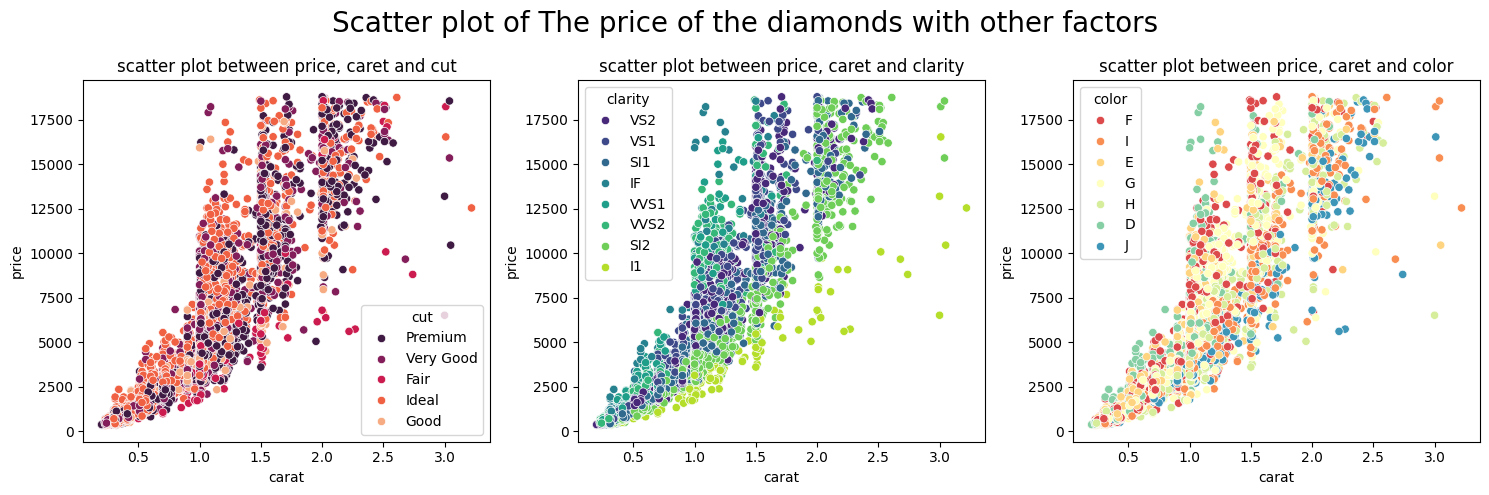

In [360]:
## Create a 1*2 plot figure
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("Scatter plot of The price of the diamonds with other factors", fontsize=20)

sns.scatterplot(data=performance, x="carat", y="price", hue="cut", palette="rocket", ax=axes[0])
axes[0].set_title('scatter plot between price, caret and cut')

sns.scatterplot(data=performance, x="carat", y="price", hue="clarity", palette="viridis", ax=axes[1])
axes[1].set_title('scatter plot between price, caret and clarity')

sns.scatterplot(data=performance, x="carat", y="price", hue="color", palette="Spectral", ax=axes[2])
axes[2].set_title('scatter plot between price, caret and color')


plt.tight_layout()
plt.show()

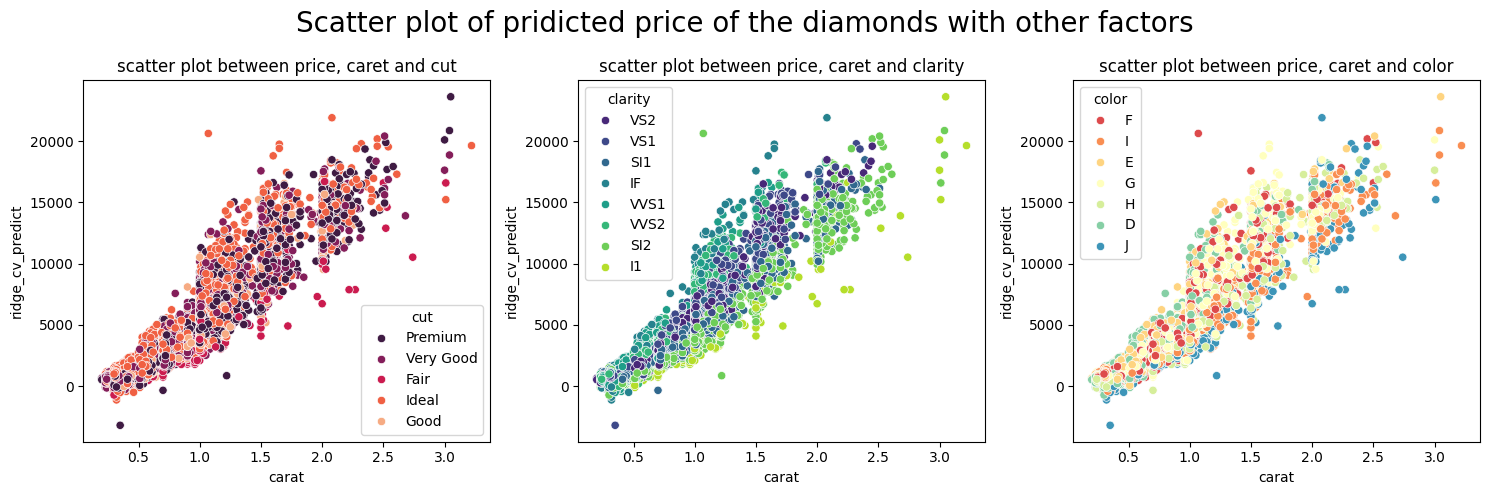

In [361]:
## Create a 1*2 plot figure
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("Scatter plot of pridicted price of the diamonds with other factors", fontsize=20)

sns.scatterplot(data=performance, x="carat", y="ridge_cv_predict", hue="cut", palette="rocket", ax=axes[0])
axes[0].set_title('scatter plot between price, caret and cut')

sns.scatterplot(data=performance, x="carat", y="ridge_cv_predict", hue="clarity", palette="viridis", ax=axes[1])
axes[1].set_title('scatter plot between price, caret and clarity')

sns.scatterplot(data=performance, x="carat", y="ridge_cv_predict", hue="color", palette="Spectral", ax=axes[2])
axes[2].set_title('scatter plot between price, caret and color')


plt.tight_layout()
plt.show()

## Conclusion

The price of the diamonds from the ridge model has 111 values that are negative which couldn't be explained by the models. This could be because of the other factors that affect the price of the diamond.